<a href="https://colab.research.google.com/github/Karansingh-25/Tensorflow/blob/main/03_Computer_Vision_CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Visionn using TensorFlow

Practise of writing algorithms that can discover pattern in visual data.

eg. Camera of a self driving car

## Food 101 Dataset Link
`http://kaggle.com/datasets/dansbecker/food-101`

## Modified Dataset Link to use only 2 classes Pizza and Steak
`https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip`


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-26 04:17:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.9MB/s    in 5.2s    

2025-03-26 04:17:38 (20.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect The Data

Crucial step of computer vision is Visualizing many samples of Data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/test

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

#walk thorugh directory
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [6]:
# Another way to find out no. of images in the file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## To visualize the images let's get class name programmatically

In [7]:
# get the class name programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [19]:
# Let's visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    """
    Generates Random images
     """
    #setup the target directory
    target_folder=target_dir+target_class
    #get a random image path
    random_image=random.sample(os.listdir(target_folder),1)
    print(random_image)
    #read the image and plot it using matplotlib
    img=mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

['287000.jpg']
Image shape: (512, 382, 3)


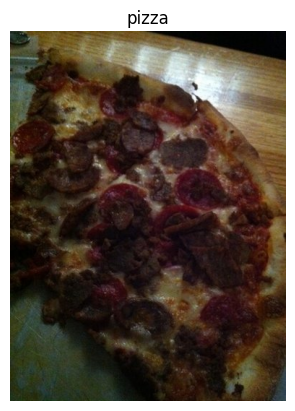

In [23]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

## An end to end Example

Let's build CNN to find patterns in our images


*   load images
*   preprosses the images
*   build CNN to find patterns

*   compile CNN
*   fit the CNN to our training data





In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprosses the data (all pixel values between 0 and 1, Scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# data paths
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

# Import Data from directories

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed=42)
# Build Architecture (Same as Tiny VGG )
# 1.
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# 3.
history_1=model_1.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))  # flow_from_directory automatically creates data labels


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - accuracy: 0.6359 - loss: 0.6443 - val_accuracy: 0.8120 - val_loss: 0.4461
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8044 - loss: 0.4500 - val_accuracy: 0.8420 - val_loss: 0.3760
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.8335 - loss: 0.4070 - val_accuracy: 0.8660 - val_loss: 0.3546
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.8359 - loss: 0.3761 - val_accuracy: 0.8620 - val_loss: 0.3374
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.8850 - loss: 0.3023 - val_accuracy: 0.8720 - val_loss: 0.3266


In [11]:
len(train_data)

47

In [12]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using a Non-CNN Model on same dataset

In [13]:
tf.random.set_seed(42)

# 1.
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5092 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5066 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.5168 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [14]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

## Tweak the previous Model

In [15]:
tf.random.set_seed(42)

# 1.
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# 2.
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3.
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.5840 - loss: 5.3729 - val_accuracy: 0.6120 - val_loss: 2.1966
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7073 - loss: 1.2524 - val_accuracy: 0.6240 - val_loss: 1.6957
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.7032 - loss: 0.9899 - val_accuracy: 0.5260 - val_loss: 1.3096
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6962 - loss: 0.8091 - val_accuracy: 0.7600 - val_loss: 0.4774
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.7239 - loss: 0.5914 - val_accuracy: 0.7940 - val_loss: 0.4389


In [16]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary Classification: Break it down


*   Become ne with data (Visualize,visualize,visualize)
*   Preprocess the data (Scaling/Normalizing)
*   Build the model
*   Fit the model
*   Evaluate the Model
*   Adjust different parameters and adjust the model
*   Repeat untill satisfied



### Become one with data

['1619357.jpg']
Image shape: (341, 512, 3)
['102037.jpg']
Image shape: (446, 512, 3)


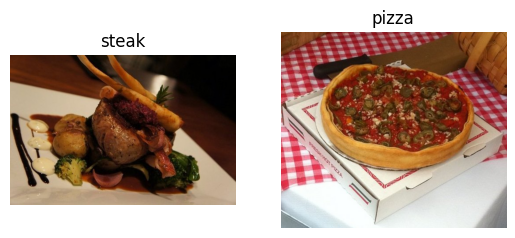

In [27]:
# Visualize Data
plt.figure
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")